<a href="https://colab.research.google.com/github/s-miramontes/News_Filter/blob/master/notebooks/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data for Clustering

In [0]:
# import statements 

import pandas as pd
import re
from joblib import Parallel, delayed
from textblob import TextBlob 
import matplotlib.pyplot as plt

## Importing Data from Local File System

Datasets are located here: https://www.kaggle.com/snapcrack/all-the-news/version/4#articles3.csv

*   download and store all three 'csv' files in a 'data' directory at the location of your choice
*   concatenate the three into one dataframe 

In [0]:
# import raw data
articles_3 = pd.read_csv('news_filter/data/articles3.csv')
articles_2 = pd.read_csv('news_filter/data/articles2.csv')
articles_1 = pd.read_csv('news_filter/data/articles1.csv')

In [0]:
articles_3.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,103459,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
1,103460,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...
2,103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
3,103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
4,103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...


In [0]:
articles_2.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,53293,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,2017-01-11,2017.0,1.0,NaN,"Patriots Day, Peter Berg’s new thriller that r..."
1,53294,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,2017-01-11,2017.0,1.0,NaN,"In Norse mythology, humans and our world were ..."
2,53295,73474,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...
3,53296,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...
4,53297,73476,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...


In [0]:
articles_1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [0]:
# publications in articles_3.csv
set(articles_3.publication)

{'Guardian', 'NPR', 'Reuters', 'Vox', 'Washington Post'}

In [0]:
# publications in articles_2.csv
set(articles_2.publication)

{'Atlantic',
 'Buzzfeed News',
 'Fox News',
 'Guardian',
 'National Review',
 'New York Post',
 'Talking Points Memo'}

In [0]:
# publications in articles_1.csv
set(articles_1.publication)

{'Atlantic', 'Breitbart', 'Business Insider', 'CNN', 'New York Times'}

In [3]:
# join all datasets into one
full_data = pd.concat([articles_1, articles_2, articles_3], ignore_index=True)

full_data.shape

(142570, 10)

In [4]:
full_data.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


## Bias Filter



*   Naive: [all-sides](https://www.allsides.com/media-bias/media-bias-ratings) to filter by publication
*   Sentiment: only nuetral articles 
*   Frequency: less than X amount of topic mentions



### Publisher Bias

In [0]:
# publisher bias ratings from AllSides
publisher_bias = {'Atlantic': 'left-center',
 'Breitbart': 'right',
 'Business Insider': 'center',
 'Buzzfeed News': 'left',
 'CNN': 'left-center',
 'Fox News': 'right',
 'Guardian': 'left-center',
 'NPR': 'center',
 'National Review': 'right',
 'New York Post': 'right',
 'New York Times': 'left-center',
 'Reuters': 'center',
 'Talking Points Memo': 'left-center',
 'Vox': 'left',
 'Washington Post': 'left-center'}

In [0]:
# dataframe with publisher and bias rating
pbias_df = pd.DataFrame({'publication':list(publisher_bias.keys()), 'pub_bias':list(publisher_bias.values())})

In [7]:
# merge full_data with publisher bias
full_data = full_data.merge(pbias_df, how="inner", on='publication')

full_data.shape

(142570, 11)

In [8]:
full_data.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,pub_bias
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,left-center
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",left-center
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",left-center
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",left-center
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",left-center


### Sentiment

In [0]:
# function to return the polarity and subjectivity score of each article ([-1, 1], [0,1])
def get_article_sentiment(article): 
    analysis = TextBlob(article) 
    return (analysis.sentiment.polarity, analysis.sentiment.subjectivity)


In [0]:
# use get_article_sentiment to get sentiment score for all the article contents
sentiment = full_data.apply(lambda row: get_article_sentiment(row['content']), axis =1)

polarity, subjectivity = zip(*sentiment)


In [11]:
sentiment

0           (0.028841991341991335, 0.4555353959765724)
1         (-0.0017503893246467515, 0.3917658789688492)
2             (0.0679717149170274, 0.4362909677128429)
3            (0.1297952794444023, 0.43564610178645263)
4             (0.1864267676767677, 0.5192234848484848)
                              ...                     
142565          (0.07434613997114, 0.3603968253968253)
142566      (0.014583333333333335, 0.4118055555555556)
142567      (0.027402687590187585, 0.4671021825396825)
142568     (0.053899524804697216, 0.40849878091257386)
142569       (0.07261883116883118, 0.3827119769119769)
Length: 142570, dtype: object

In [0]:
full_data['polarity'] = polarity
full_data['subjectivity'] = subjectivity

In [19]:
full_data.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,pub_bias,polarity,subjectivity
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,left-center,0.028842,0.455535
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",left-center,-0.001750,0.391766
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",left-center,0.067972,0.436291
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",left-center,0.129795,0.435646
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",left-center,0.186427,0.519223


<BarContainer object of 15 artists>

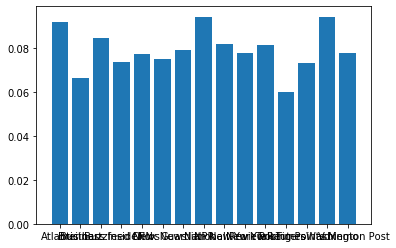

In [21]:
pub_avg_senti = full_data.groupby('publication').mean().polarity
avg_senti_df = pd.DataFrame(pub_avg_senti).sort_values('polarity', ascending=True)

plt.bar(pub_avg_senti.index, pub_avg_senti.values)

In [14]:
nuetral_sentiment = full_data[(full_data.sentiment <= 0.05) & (full_data.sentiment >= -0.05)]

nuetral_sentiment

(41454, 11)

## Clean Data 



*   remove duplicates and missing titles 
*   sample/import 200 for model evaluation  
*   sample 13k for training 
*   remove publisher tags from titles 
*   remove publisher tags from titles 



In [0]:
# remove duplicates
full_data = full_data.drop_duplicates(subset=['title', 'publication', 'author', 'date'])

In [0]:
# remove missing titles 
full_data = full_data.dropna(subset=['title'])

In [0]:
## sample 200 observations from full_data (set seed to 5) for evaluation 
#sample200 = full_data.sample(n=200, random_state=5).reset_index()
#sample200.to_csv('news_filter/data/sample200', index=False) # annotate cluster labels 

# import annotated evaluation data 
eval_data = pd.read_csv('news_filter/data/sample200.csv')
set(eval_data.publication)

{'Atlantic',
 'Breitbart',
 'Business Insider',
 'Buzzfeed News',
 'CNN',
 'Fox News',
 'Guardian',
 'NPR',
 'National Review',
 'New York Post',
 'New York Times',
 'Reuters',
 'Talking Points Memo',
 'Vox',
 'Washington Post'}

In [0]:
eval_data.shape

(200, 12)

In [0]:
eval_data.head()

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content,label
0,74496,77946,118473,"Chaos in the Family, Chaos in the State: The W...",National Review,Kevin D. Williamson,2016-03-17,2016.0,3.0,http://www.nationalreview.com/article/432876/d...,Michael Brendan Dougherty is bitter. I think t...,0
1,71184,74592,113594,US Civil Rights Commission Will Observe Standi...,Buzzfeed News,Nidhi Subbaraman,2016-12-08,2016.0,12.0,https://web.archive.org/web/20161208153906/htt...,WASHINGTON — The US Commission on Civil Ri...,0
2,120205,123668,184574,"Venezuela hunts rogue helicopter attackers, Ma...",Reuters,Andrew Cawthorne and Victoria Ramirez,2017-06-29,2017.0,6.0,http://www.reuters.com/article/us-venezuela-po...,The Venezuelan government hunted on Wednesday...,0
3,128977,132440,199665,Fruit juice isn’t much better for you than sod...,Vox,Julia Belluz,2016/3/25,2016.0,3.0,http://www.vox.com/2016/3/25/11305614/soda-jui...,One of the biggest public health wins of rece...,0
4,134837,138300,208223,Sessions won’t testify at congressional budget...,Washington Post,Sari Horwitz,2017-06-10,2017.0,6.0,https://web.archive.org/web/20170611000758/htt...,"Attorney General Jeff Sessions, who had agree...",1


In [0]:
# sample 13k observations from full_data (set seed to 5) for training
small_data = full_data.sample(n=13000, random_state=5).reset_index()
set(small_data.publication)

{'Atlantic',
 'Breitbart',
 'Business Insider',
 'Buzzfeed News',
 'CNN',
 'Fox News',
 'Guardian',
 'NPR',
 'National Review',
 'New York Post',
 'New York Times',
 'Reuters',
 'Talking Points Memo',
 'Vox',
 'Washington Post'}

In [0]:
small_data.shape

(13000, 11)

In [0]:
small_data.head()

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,74496,77946,118473,"Chaos in the Family, Chaos in the State: The W...",National Review,Kevin D. Williamson,2016-03-17,2016.0,3.0,http://www.nationalreview.com/article/432876/d...,Michael Brendan Dougherty is bitter. I think t...
1,71184,74592,113594,US Civil Rights Commission Will Observe Stand...,Buzzfeed News,Nidhi Subbaraman,2016-12-08,2016.0,12.0,https://web.archive.org/web/20161208153906/htt...,WASHINGTON — The US Commission on Civil Ri...
2,120205,123668,184574,"Venezuela hunts rogue helicopter attackers, Ma...",Reuters,Andrew Cawthorne and Victoria Ramirez,2017-06-29,2017.0,6.0,http://www.reuters.com/article/us-venezuela-po...,The Venezuelan government hunted on Wednesday...
3,128977,132440,199665,Fruit juice isn’t much better for you than sod...,Vox,Julia Belluz,2016/3/25,2016.0,3.0,http://www.vox.com/2016/3/25/11305614/soda-jui...,One of the biggest public health wins of rece...
4,134837,138300,208223,Sessions won’t testify at congressional budget...,Washington Post,Sari Horwitz,2017-06-10,2017.0,6.0,https://web.archive.org/web/20170611000758/htt...,"Attorney General Jeff Sessions, who had agree..."


In [0]:
# remove publisher tags from article titles 

def clean_title(title):
  title = re.sub(r"(- Breitbart)(?!.*\1)", '', title)
  title = re.sub(r'(- The New York Times)(?!.*\1)', '', title)
  return title
  
eval_data['title'] = Parallel(n_jobs=16)(delayed(clean_title)(title) for title in eval_data.title)
small_data['title'] = Parallel(n_jobs=16)(delayed(clean_title)(title) for title in small_data.title)

In [0]:
# change output settings to view entire text
pd.set_option('display.max_colwidth', -1)

In [0]:
# check if titles were successfully cleaned
eval_data.title[120:130]

120    Nine Charged with Sex Assault in Texas High School Hazing Scandal                                            
121    Lou Dobbs: ’Eager Tool of the Establishment’ Paul Ryan ’an Embarrassment’ to the GOP                         
122    Obama’s State Department Sponsored 2016 Meeting of Russian Ambassador with Sen. Sessions                     
123    MS-13 gang member turned FBI informant describes life in the violent street gang                             
124    Wikileaks: Clinton Team Feared Labor Backlash After Obama Cleared Malaysia’s Human Rights Record to Push TPP 
125    Obama Eid Celebration Again Empowers Islamists Over Reformers                                                
126    The Edge: But Who Will Get the Crucial Pizza Rat Vote?                                                       
127    FBI: Clinton ’extremely careless’ but no charges recommended                                                 
128    The New Normal of Colin Kaepernick’s Protest             

In [0]:
# check if titles were successfully cleaned
small_data.title[120:130]

120    Nine Charged with Sex Assault in Texas High School Hazing Scandal                                            
121    Lou Dobbs: ’Eager Tool of the Establishment’ Paul Ryan ’an Embarrassment’ to the GOP                         
122    Obama’s State Department Sponsored 2016 Meeting of Russian Ambassador with Sen. Sessions                     
123    MS-13 gang member turned FBI informant describes life in the violent street gang                             
124    Wikileaks: Clinton Team Feared Labor Backlash After Obama Cleared Malaysia’s Human Rights Record to Push TPP 
125    Obama Eid Celebration Again Empowers Islamists Over Reformers                                                
126     The Edge: But Who Will Get the Crucial Pizza Rat Vote?                                                      
127    FBI: Clinton ’extremely careless’ but no charges recommended                                                 
128    The New Normal of Colin Kaepernick’s Protest             

In [0]:
# join titles with content of article
eval_data['text'] = list(map(lambda i,j: i + " " + j, eval_data.title, eval_data.content))
small_data['text'] = list(map(lambda i,j: i + " " + j, small_data.title, small_data.content))

In [0]:
# reset display settings 
pd.reset_option("all")


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/home/erusson/anaconda3/lib/python3.7/site-packages/pandas/_config/config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [0]:
eval_data.head()

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content,label,text
0,74496,77946,118473,"Chaos in the Family, Chaos in the State: The W...",National Review,Kevin D. Williamson,2016-03-17,2016.0,3.0,http://www.nationalreview.com/article/432876/d...,Michael Brendan Dougherty is bitter. I think t...,0,"Chaos in the Family, Chaos in the State: The W..."
1,71184,74592,113594,US Civil Rights Commission Will Observe Standi...,Buzzfeed News,Nidhi Subbaraman,2016-12-08,2016.0,12.0,https://web.archive.org/web/20161208153906/htt...,WASHINGTON — The US Commission on Civil Ri...,0,US Civil Rights Commission Will Observe Standi...
2,120205,123668,184574,"Venezuela hunts rogue helicopter attackers, Ma...",Reuters,Andrew Cawthorne and Victoria Ramirez,2017-06-29,2017.0,6.0,http://www.reuters.com/article/us-venezuela-po...,The Venezuelan government hunted on Wednesday...,0,"Venezuela hunts rogue helicopter attackers, Ma..."
3,128977,132440,199665,Fruit juice isn’t much better for you than sod...,Vox,Julia Belluz,2016/3/25,2016.0,3.0,http://www.vox.com/2016/3/25/11305614/soda-jui...,One of the biggest public health wins of rece...,0,Fruit juice isn’t much better for you than sod...
4,134837,138300,208223,Sessions won’t testify at congressional budget...,Washington Post,Sari Horwitz,2017-06-10,2017.0,6.0,https://web.archive.org/web/20170611000758/htt...,"Attorney General Jeff Sessions, who had agree...",1,Sessions won’t testify at congressional budget...


In [0]:
small_data.head()

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content,text
0,74496,77946,118473,"Chaos in the Family, Chaos in the State: The W...",National Review,Kevin D. Williamson,2016-03-17,2016.0,3.0,http://www.nationalreview.com/article/432876/d...,Michael Brendan Dougherty is bitter. I think t...,"Chaos in the Family, Chaos in the State: The W..."
1,71184,74592,113594,US Civil Rights Commission Will Observe Stand...,Buzzfeed News,Nidhi Subbaraman,2016-12-08,2016.0,12.0,https://web.archive.org/web/20161208153906/htt...,WASHINGTON — The US Commission on Civil Ri...,US Civil Rights Commission Will Observe Stand...
2,120205,123668,184574,"Venezuela hunts rogue helicopter attackers, Ma...",Reuters,Andrew Cawthorne and Victoria Ramirez,2017-06-29,2017.0,6.0,http://www.reuters.com/article/us-venezuela-po...,The Venezuelan government hunted on Wednesday...,"Venezuela hunts rogue helicopter attackers, Ma..."
3,128977,132440,199665,Fruit juice isn’t much better for you than sod...,Vox,Julia Belluz,2016/3/25,2016.0,3.0,http://www.vox.com/2016/3/25/11305614/soda-jui...,One of the biggest public health wins of rece...,Fruit juice isn’t much better for you than sod...
4,134837,138300,208223,Sessions won’t testify at congressional budget...,Washington Post,Sari Horwitz,2017-06-10,2017.0,6.0,https://web.archive.org/web/20170611000758/htt...,"Attorney General Jeff Sessions, who had agree...",Sessions won’t testify at congressional budget...


In [0]:
# output csv files for eval and train data
eval_data.to_csv('news_filter/data/eval_data.csv', index=False)
small_data.to_csv('news_filter/data/small_data.csv', index=False)